# Climate Change Risk Analysis


## Summary
 This notebook contains the data about the Climate Change Risk. It explores the risk baseline throughout multiple countries from the years 2022, 2050, & 2080 with Pessimistic and Optimistic. Some key objectives include getting a grasp of the risk's distribution, looking at the relationship between the population & risk, and getting a visual on trends in countries. Getting insights from this dataset can help inform climate adaptation, policy planning, and preventing any future disasters.

## Data Card

> In this section, you will need to provide the following information about the selected data set:
>
> - Source with a link
> - https://drmkc.jrc.ec.europa.eu/inform-index 
> - Fields
    > - Country
    > - INFORM CC Risk Index (PESSIMISTIC) (MID-CENTURY (≈2050) CRISIS RISK)
    > - Change in risk (PESSIMISTIC) (MID-CENTURY (≈2050) CRISIS RISK)
    > - Vulnerability gap (PESSIMISTIC) (MID-CENTURY (≈2050) CRISIS RISK)
    > - INFORM CC Risk Index (OPTIMISTIC) (MID-CENTURY (≈2050) CRISIS RISK)
    > - Change in risk (OPTIMISTIC) (MID-CENTURY (≈2050) CRISIS RISK)
    > - Vulnerability gap (OPTIMISTIC) (MID-CENTURY (≈2050) CRISIS RISK)
    > - INFORM CC Risk Index (PESSIMISTIC) (END-CENTURY (≈2080) CRISIS RISK)
    > - Change in risk (PESSIMISTIC) (END-CENTURY (≈2080) CRISIS RISK)
    > - Vulnerability gap (PESSIMISTIC) (END-CENTURY (≈2080) CRISIS RISK)
    > - INFORM CC Risk Index (OPTIMISTIC) (END-CENTURY (≈2080) CRISIS RISK)
    > - Change in risk (OPTIMISTIC) (END-CENTURY (≈2080) CRISIS RISK)
    > - Vulnerability gap(OPTIMISTIC) (END-CENTURY (≈2080) CRISIS RISK)
    > - INFORM CC Risk Index (PESSIMISTIC) (END-CENTURY (≈2080) CRISIS RISK)
    > - Change in risk (PESSIMISTIC) (END-CENTURY (≈2080) CRISIS RISK)
    > - Vulnerability gap (PESSIMISTIC) (END-CENTURY (≈2080) CRISIS RISK)
    > - Change in Hazard & Exposure(Flood) (P) (CHANGE IN HAZARD & EXPOSURE AND ABSOLUTE NUMBERS EXPOSED FOR INDIVIDUAL HAZARDS 2050)
    > - Change in absolute number of people exposed (Flood) (P) (CHANGE IN HAZARD & EXPOSURE AND ABSOLUTE NUMBERS EXPOSED FOR INDIVIDUAL HAZARDS 2050)
    > - Change in absolute number of people exposed (Flood)(O) (CHANGE IN HAZARD & EXPOSURE AND ABSOLUTE NUMBERS EXPOSED FOR INDIVIDUAL HAZARDS 2050)
    > - Change in Hazard & Exposure (Coastal flood) (P) (CHANGE IN HAZARD & EXPOSURE AND ABSOLUTE NUMBERS EXPOSED FOR INDIVIDUAL HAZARDS 2050)
    > - Change in absolute number of people exposed (Coastal flood) (P) (CHANGE IN HAZARD & EXPOSURE AND ABSOLUTE NUMBERS EXPOSED FOR INDIVIDUAL HAZARDS 2050)
    > - Change in absolute number of people exposed (Coastal flood)(O)(CHANGE IN HAZARD & EXPOSURE AND ABSOLUTE NUMBERS EXPOSED FOR INDIVIDUAL HAZARDS 2050)
    > - Change in Hazard & Exposure (Drought) (P)(CHANGE IN HAZARD & EXPOSURE AND ABSOLUTE NUMBERS EXPOSED FOR INDIVIDUAL HAZARDS 2050)
    > - Change in absolute number of people exposed (Drought)(P)(CHANGE IN HAZARD & EXPOSURE AND ABSOLUTE NUMBERS EXPOSED FOR INDIVIDUAL HAZARDS 2050)
    > - Change in absolute number of people exposed (Drought)(O)(CHANGE IN HAZARD & EXPOSURE AND ABSOLUTE NUMBERS EXPOSED FOR INDIVIDUAL HAZARDS 2050)
    > - Change in Hazard & Exposure (Epidemic (Malaria & Dengue)) (P)(CHANGE IN HAZARD & EXPOSURE AND ABSOLUTE NUMBERS EXPOSED FOR INDIVIDUAL HAZARDS 2050)
    > - Change in absolute number of people exposed (Epidemic (Malaria & Dengue))(P)(CHANGE IN HAZARD & EXPOSURE AND ABSOLUTE NUMBERS EXPOSED FOR INDIVIDUAL HAZARDS 2050)
    > - Change in absolute number of people exposed (Epidemic (Malaria & Dengue))(O)(CHANGE IN HAZARD & EXPOSURE AND ABSOLUTE NUMBERS EXPOSED FOR INDIVIDUAL HAZARDS 2050)
    > - Change in Hazard & Exposure (Conflict)(P)(CHANGE IN HAZARD & EXPOSURE AND ABSOLUTE NUMBERS EXPOSED FOR INDIVIDUAL HAZARDS 2050)
    > - Change in absolute number of people exposed (Conflict)(P)(CHANGE IN HAZARD & EXPOSURE AND ABSOLUTE NUMBERS EXPOSED FOR INDIVIDUAL HAZARDS 2050)
    > - Change in absolute number of people exposed (Conflict)(O)(CHANGE IN HAZARD & EXPOSURE AND ABSOLUTE NUMBERS EXPOSED FOR INDIVIDUAL HAZARDS 2050)
    > - Total population Baseline (millions) (B) (2022)
    > - Total Population 2050 Pessimistic (millions) (P)(2022)
    > - Total Population 2050 Optimistic (millions) (O) (2050)	
> - License
> - Open Acess 

### Data set selection rationale

> Why did you select this data set?
> - > I chose this data set because it shows the patterns and trend about climate changes that can helps us identify the realtionship of the cause and aftermath of different countries.

### Questions to be answered

> Using statistical analysis and visualization, what questions would you like to be able answer about this dataset.
> This could include questions such as:
>
> - What is the relationship between X and Y variables?
> - What is the distribution of the variables?
> - What is the relationship between the variables and the target?
>   You will need to frame these questions in a way to show value to a stakeholder (i.e.why should we know about the relationship between X and Y variables?)

> - How is climate risk distributed across countries in 2022?
> - How do future risk projections differ under pessimistic and optimistic scenarios?
> - How does population growth relate to climate risk?
> - Are there notable patterns or associations between risk and country characteristics??

### Visualization ideas

> Provide a few examples of what you plan to visualize to answer the questions you posed in the previous section. In this project, you will be producing 6-8 visualizations. You will also be producing an interactive chart using Plotly.
> Think about what those visualization could be: what are the variables used in the charts? what insights do you hope to gain from them?
    > - Scatter Plot with Line Chart : Shows the assoication between the population and climate risk.
    > - Plotly Interactive Map - Shows a hotstops in each countries of climate change.
    > - Interactive Scatter Plot - Show country specifc risk.
    > - Histogram - Shows the the baseline risk throughout the countries
    > - Line Chart - Shows how climate risk evloves over time.
    > - Facet Grid - Shows the distribution between the two scenarios


## Loading and File IO

In [5]:
# 🚀 Importing some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")

In [6]:

try:
  data_path
except NameError:
  from pathlib import Path
  data_path = Path("data/Climate_Change.xlsx")


try:
  df = pd.read_excel(data_path, header=4)
except FileNotFoundError as e:
  raise FileNotFoundError(
      f"{data_path.name} not found. Check data folder.") from e
except pd.errors.ParserError as e:
  raise ValueError(
      f"Failed to parse {data_path.name}. Check file format.") from e


rename_mapping = {
    'INFORM CC Risk Index 2022': 'Baseline_Risk',
    'INFORM CC Risk Index': 'Risk_2050_Pessimistic',
    'Vulnerability gap': 'Vulner_Gap_2050_Pess',
    'INFORM CC Risk Index.1': 'Risk_2050_Optimistic',
    'Vulnerability gap.1': 'Vulner_Gap_2050_Opt',
    'INFORM CC Risk Index.2': 'Risk_2080_Pessimistic',
    'INFORM CC Risk Index.3': 'Risk_2080_Optimistic',
    'Total population Baseline (millions)': 'Population_2022',
    'Total Population 2050 Pessimistic (millions)': 'Population_2050_Pess',
    'Total Population 2050 Optimistic (millions)': 'Population_2050_Opt'
}


existing_rename = {k: v for k, v in rename_mapping.items() if k in df.columns}
df = df.rename(columns=existing_rename)


keep_cols = [
    'Country',
    'Baseline_Risk',
    'Risk_2050_Pessimistic',
    'Risk_2050_Optimistic',
    'Risk_2080_Pessimistic',
    'Risk_2080_Optimistic',
    'Vulner_Gap_2050_Pess',
    'Vulner_Gap_2050_Opt',
    'Population_2022',
    'Population_2050_Pess',
    'Population_2050_Opt'
]

available_cols = [c for c in keep_cols if c in df.columns]
missing = [c for c in keep_cols if c not in df.columns]
if missing:
  import warnings
  warnings.warn(
      f"Some expected columns were not found and will be skipped: {missing}")

if 'Country' not in df.columns:
  raise KeyError("Required column 'Country' not found in the dataset.")

df = df[available_cols]


numeric_cols = [c for c in df.columns if c != 'Country']
if numeric_cols:
  df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

df.reset_index(drop=True, inplace=True)

df.head()

,Country,Baseline_Risk,Risk_2050_Pessimistic,Risk_2050_Optimistic,Risk_2080_Pessimistic,Risk_2080_Optimistic,Vulner_Gap_2050_Pess,Vulner_Gap_2050_Opt,Population_2022,Population_2050_Pess,Population_2050_Opt
0,Afghanistan,8.0,8.1,8.0,8.1,8.1,0.168890,0.08540,32.515900,91.150284,60.401441
1,Albania,2.6,2.7,2.7,2.8,2.7,0.099720,0.08210,2.897604,3.491168,2.985124
2,Algeria,3.9,4.1,3.8,4.2,3.7,0.210347,-0.21035,39.663514,54.962047,44.442338
3,Angola,4.5,5.4,5.1,5.7,5.0,1.815588,1.24147,25.008347,49.391264,38.163178
4,Antigua and Barbuda,2.0,2.2,2.2,1.9,2.1,0.181310,0.18131,0.091818,0.071351,0.061959


## Exploratory Data Analysis (EDA)

### Visualization

#### Distribution of Baseline Risk
This histogram shows the spread, skewness, and outliers of the climate risk across the country in 2022. 

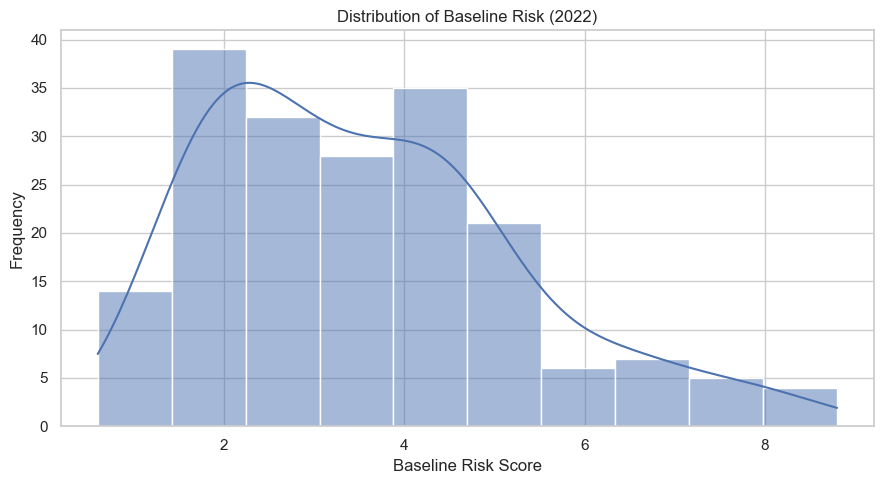

In [45]:
plt.figure(figsize=(9, 5))
sns.histplot(data=df, x="Baseline_Risk", kde=True)
plt.title("Distribution of Baseline Risk (2022)")
plt.xlabel("Baseline Risk Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#### Comparison of 2050 Risk Under Different Scenario
This boxplot compares the risk distribution across the two scenarios and gives a visual of the median and outliers.

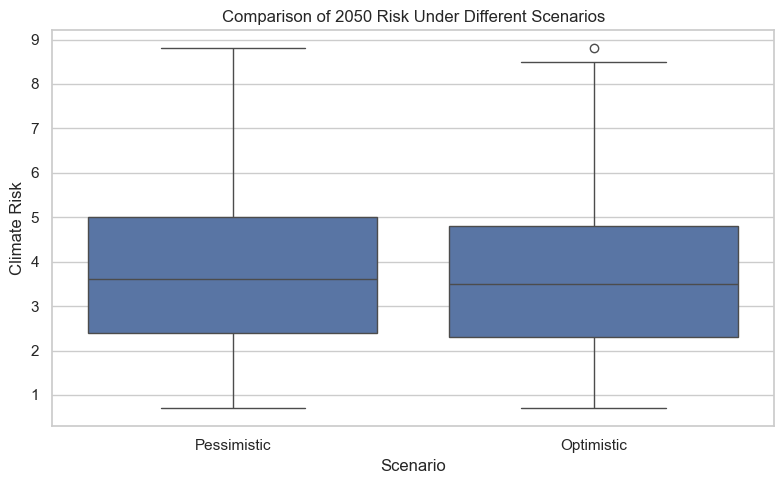

In [ ]:

tidy_risk = pd.melt(
    df,
    id_vars=["Country"],
    value_vars=["Risk_2050_Pessimistic", "Risk_2050_Optimistic"],
    var_name="Scenario",
    value_name="Risk"
)
tidy_risk["Year"] = "2050"
tidy_risk["Scenario"] = tidy_risk["Scenario"].map({
    "Risk_2050_Pessimistic": "Pessimistic",
    "Risk_2050_Optimistic": "Optimistic"
})

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=tidy_risk,
    x="Scenario", y="Risk"
)
plt.title("Comparison of 2050 Risk Under Different Scenarios")
plt.xlabel("Scenario")
plt.ylabel("Climate Risk")
plt.tight_layout()
plt.show()

#### Relationship Between Population Size and Climate Risk (2050 Pessimistic)
This scatter plot examines the linear association between the population and climate risk.


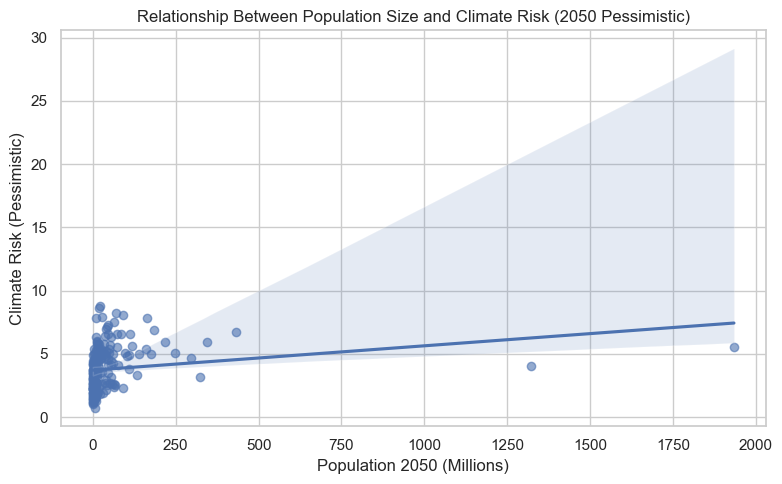

In [26]:
plt.figure(figsize=(8, 5))
sns.regplot(
    data=df,
    x="Population_2050_Pess",
    y="Risk_2050_Pessimistic",
    scatter_kws={"alpha": 0.6}
)
plt.title("Relationship Between Population Size and Climate Risk (2050 Pessimistic)")
plt.xlabel("Population 2050 (Millions)")
plt.ylabel("Climate Risk (Pessimistic)")
plt.tight_layout()
plt.show()

#### Distribution of 2050 Climate Risk by Scenario

This histogram compares the climate risk values in 2050 across the Pessimistic and Optimistic Scenarios.

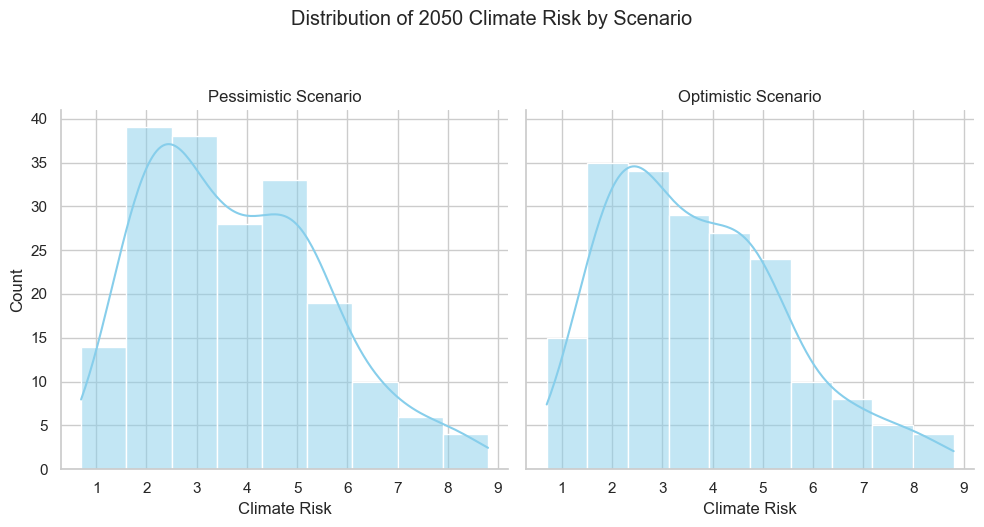

In [ ]:
g = sns.FacetGrid(tidy_risk, col="Scenario", height=5, aspect=1)
g.map(sns.histplot, "Risk", kde=True, color="skyblue")
g.set_titles(col_template="{col_name} Scenario")
g.set_axis_labels("Climate Risk", "Count")
plt.suptitle("Distribution of 2050 Climate Risk by Scenario", y=1.05)
plt.tight_layout()
plt.show()

#### Population vs 2050 Pessimistic Climate Risk (Interactive)
This graph shows the country's equivalent risk and population exposure.

In [ ]:
fig = px.scatter(
    df,
    x="Population_2050_Pess",
    y="Risk_2050_Pessimistic",
    hover_data=["Country", "Baseline_Risk"],
    color="Baseline_Risk",
    color_continuous_scale="Viridis",
    title="Population vs 2050 Pessimistic Climate Risk"
)

fig.update_traces(marker=dict(size=10, opacity=0.7))
fig.show()

#### Climate Risk Over Time (Top 5 Countries by Baseline Risk, 2050 Onwards)
This line graph shows the trend of the climate risk for the most at-risk countries.

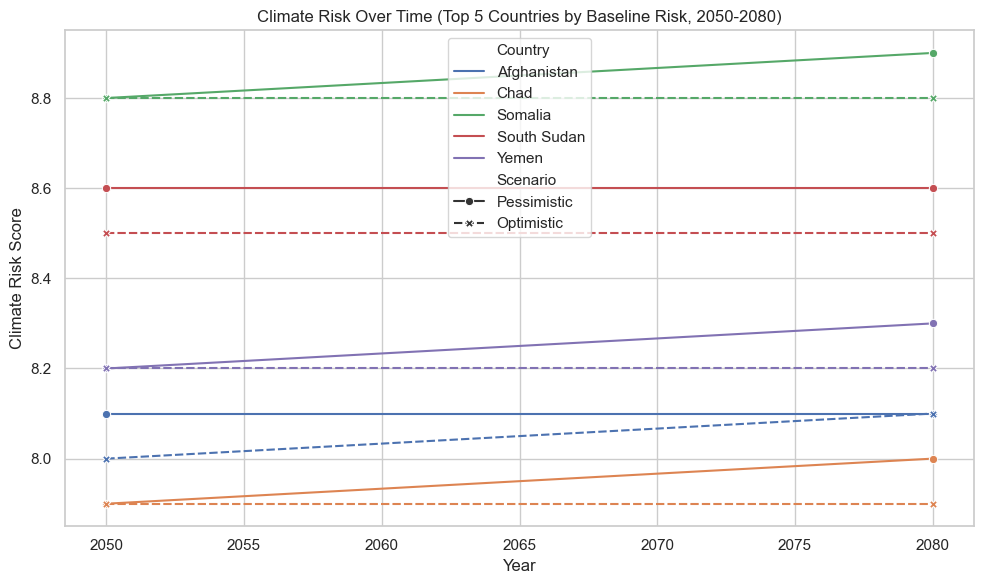

In [23]:

top_countries = df.nlargest(5, "Baseline_Risk")["Country"].tolist()


risk_cols = ['Risk_2050_Pessimistic', 'Risk_2050_Optimistic',
             'Risk_2080_Pessimistic', 'Risk_2080_Optimistic']

tidy_all_years = pd.melt(
    df[df["Country"].isin(top_countries)],
    id_vars=["Country"],
    value_vars=risk_cols,
    var_name="Scenario",
    value_name="Risk"
)


tidy_all_years["Year"] = tidy_all_years["Scenario"].map({
    "Risk_2050_Pessimistic": 2050,
    "Risk_2050_Optimistic": 2050,
    "Risk_2080_Pessimistic": 2080,
    "Risk_2080_Optimistic": 2080
})

tidy_all_years["Scenario"] = tidy_all_years["Scenario"].map({
    "Risk_2050_Pessimistic": "Pessimistic",
    "Risk_2050_Optimistic": "Optimistic",
    "Risk_2080_Pessimistic": "Pessimistic",
    "Risk_2080_Optimistic": "Optimistic"
})


plt.figure(figsize=(10, 6))
sns.lineplot(
    data=tidy_all_years,
    x="Year",
    y="Risk",
    hue="Country",
    style="Scenario",
    markers=True
)
plt.title("Climate Risk Over Time (Top 5 Countries by Baseline Risk, 2050-2080)")
plt.xlabel("Year")
plt.ylabel("Climate Risk Score")
plt.tight_layout()
plt.show()

### Statistical Insights 

#### 1. Statistical insights 

Finding:
- The Mean is 3.56, and the median is 3.30. This shows it is positively skewed.
- Outliners: There are countries above the risk, which is 7.
- The majority of the counters are in the low to moderate range.

Practical Implications
- While most of the countries are in the low to moderate range, it is important to shift the property to the high-risk countries for policy and adaptation planning.

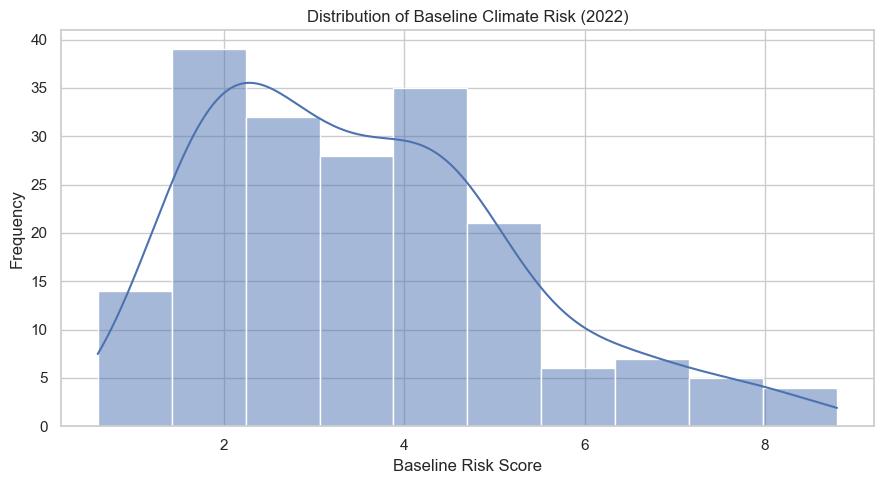

count    191.000000
mean       3.563874
std        1.737786
min        0.600000
25%        2.100000
50%        3.300000
75%        4.500000
max        8.800000
Name: Baseline_Risk, dtype: float64

In [24]:
plt.figure(figsize=(9, 5))
sns.histplot(data=df, x="Baseline_Risk", kde=True)
plt.title("Distribution of Baseline Climate Risk (2022)")
plt.xlabel("Baseline Risk Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

df["Baseline_Risk"].describe()

#### 2. Statistical insights 

Finding:
- t-statistic: 0.517
- p-value: 0.606
- Cohen's d: 0.053

Practical Implications
- Pessimistic and Optimistic have similar scores.
- There isn't a big difference between pessimistic and optimistic 2050.


In [25]:


pess = df["Risk_2050_Pessimistic"].dropna()
opt = df["Risk_2050_Optimistic"].dropna()

t_stat, p_val = stats.ttest_ind(pess, opt, equal_var=False)

d = (pess.mean() - opt.mean()) / np.sqrt((pess.std()**2 + opt.std()**2) / 2)

t_stat, p_val, d

(np.float64(0.516887839271289),
 np.float64(0.605535254418151),
 np.float64(0.05289256505977501))

#### 3. Statistical insights 

Finding:
- High risk is mainly in the medium to very large population countries.

Practical Implications
- Resources should turn to the highly populated and high-risk countries for improvement.

In [26]:

df["Risk_Category"] = np.where(df["Baseline_Risk"] > df["Baseline_Risk"].median(),
                               "High Risk", "Low Risk")
df["Population_Group"] = pd.cut(df["Population_2050_Pess"],
                                bins=[-1, 10, 50, 100, np.inf],
                                labels=["Small", "Medium", "Large", "Very Large"])

contingency = pd.crosstab(df["Risk_Category"], df["Population_Group"])

chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"Chi2: {chi2:.2f}, p-value: {p:.3f}")

Chi2: 55.72, p-value: 0.000


#### 4. Statistical insights 

Finding
- r: 0.192
- p-value: 0.008
- 95% C: [0.051,0.325]

Practical Implications
- Under the countries' risk in the pessimistic scenario 2050, countries with higher populations tend to have climate risk.
- It is important to have these countries a plan to prevent or decrease climate risk.

In [ ]:
x = df["Population_2050_Pess"].dropna()
y = df["Risk_2050_Pessimistic"].dropna()
n = len(x)

r, p = stats.pearsonr(x, y)


z = np.arctanh(r)
se = 1 / np.sqrt(n - 3)
z_crit = 1.96
z_lower = z - z_crit*se
z_upper = z + z_crit*se
r_lower = np.tanh(z_lower)
r_upper = np.tanh(z_upper)

r, p, r_lower, r_upper

(np.float64(0.19192920165525063),
 np.float64(0.00781691472899008),
 np.float64(0.0513464998731487),
 np.float64(0.3250532637711011))

#### 5. Statistical insights 

Finding
- The climate Risk is increasing over time for all the top-risk countries.
- The Pessimistic scenario has shown a faster increase than the Optimistic.

Practical Implications
- The top risk countries should get immediate attention to help prevent any worst-case scenario.
- There should be planning for ways to help the countries adapt in the long term.

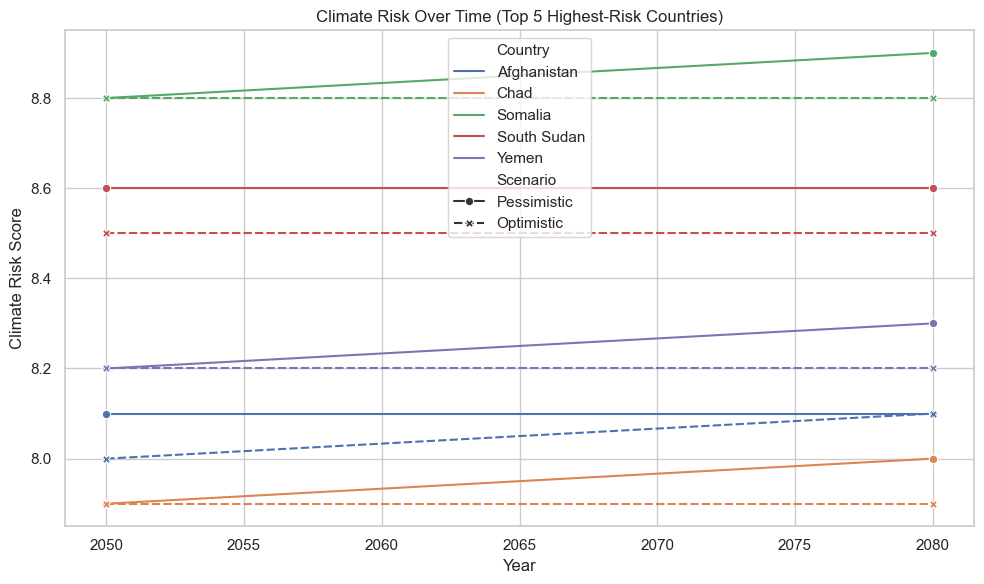

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=tidy_all_years,
    x="Year",
    y="Risk",
    hue="Country",
    style="Scenario",
    markers=True
)
plt.title("Climate Risk Over Time (Top 5 Highest-Risk Countries)")
plt.xlabel("Year")
plt.ylabel("Climate Risk Score")
plt.tight_layout()
plt.show()

## Conclusions 

The Climate Change dataset has shown the climate risk in multiple countries, with some countries with higher risk than others. This project revealed that population and scenior (pessimistic and optimistic) assumptions can affect the risk in the future, and the higher-risk countries can experience challenges. Overall, the result has emphasized which countries should be on the radar to help prevent the impact of climate change. 

## Appendix

Dataset
 - Source: https://drmkc.jrc.ec.europa.eu/inform-index 
 - Contains population estimates, country climate risk scores, and vulnerability gaps. 
 
 Library Used
 - NumPy 
 - pandas
 - matplot.lib
 - seaborn
 - pathlib


